In [1]:
from chromatic_fitting import *
from chromatic import Rainbow, SimulatedRainbow
from pymc3 import Normal, Uniform, Model, HalfNormal,Deterministic,  plot_trace, sample_prior_predictive, sample_posterior_predictive
from tqdm import tqdm
from pymc3_ext import eval_in_model, optimize, sample, ParameterGroup
from exoplanet import QuadLimbDark, ImpactParameter
plt.matplotlib.style.use('default')

Running on Python v3.9.12 | packaged by conda-forge | (main, Mar 24 2022, 23:23:20) 
[Clang 12.0.1 ]
Running on numpy v1.22.3
Running on chromatic v0.1.5


# Create Synthetic Rainbow with Transit

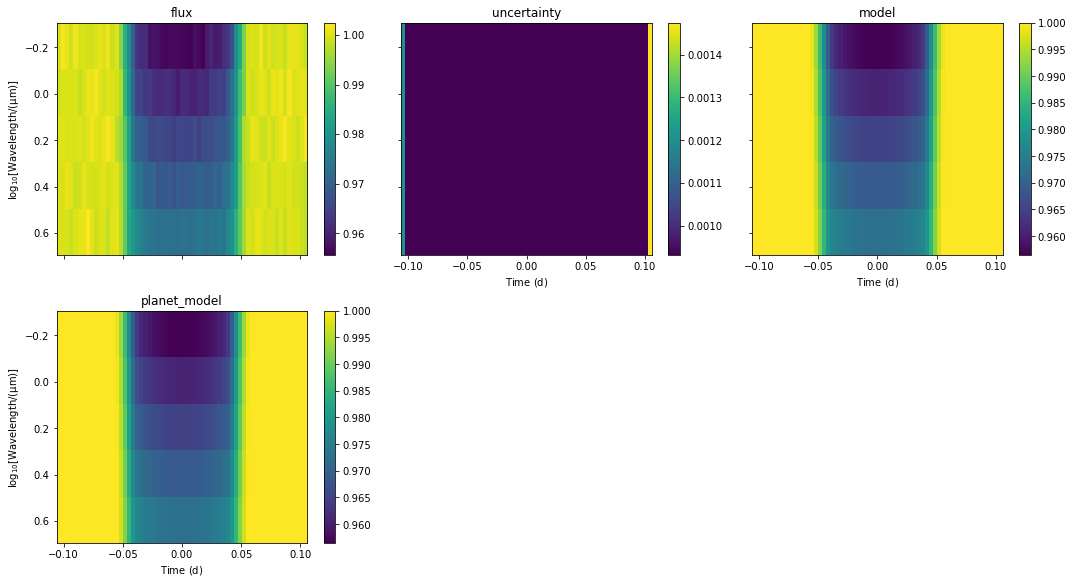

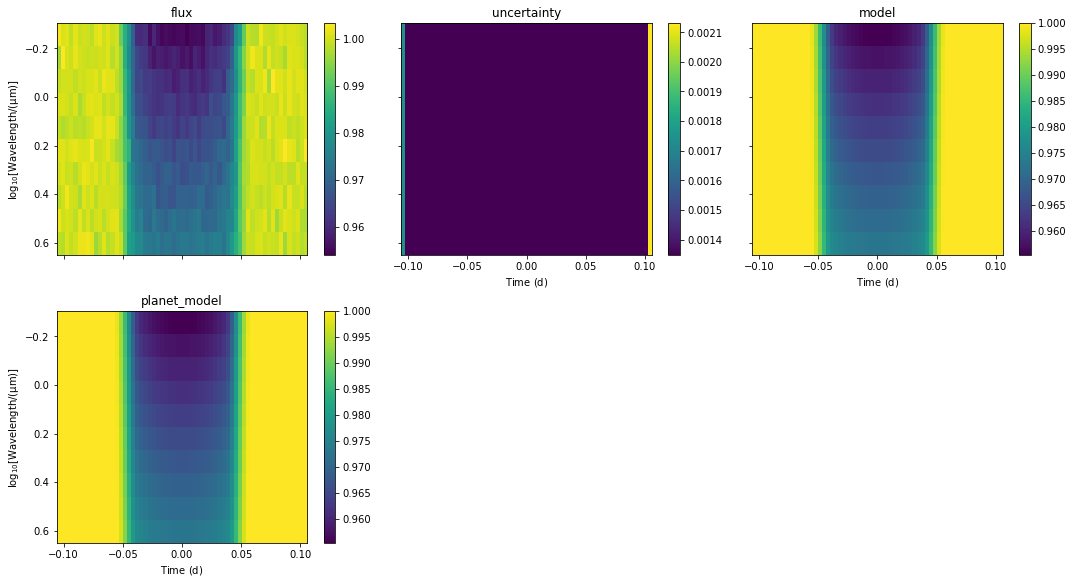

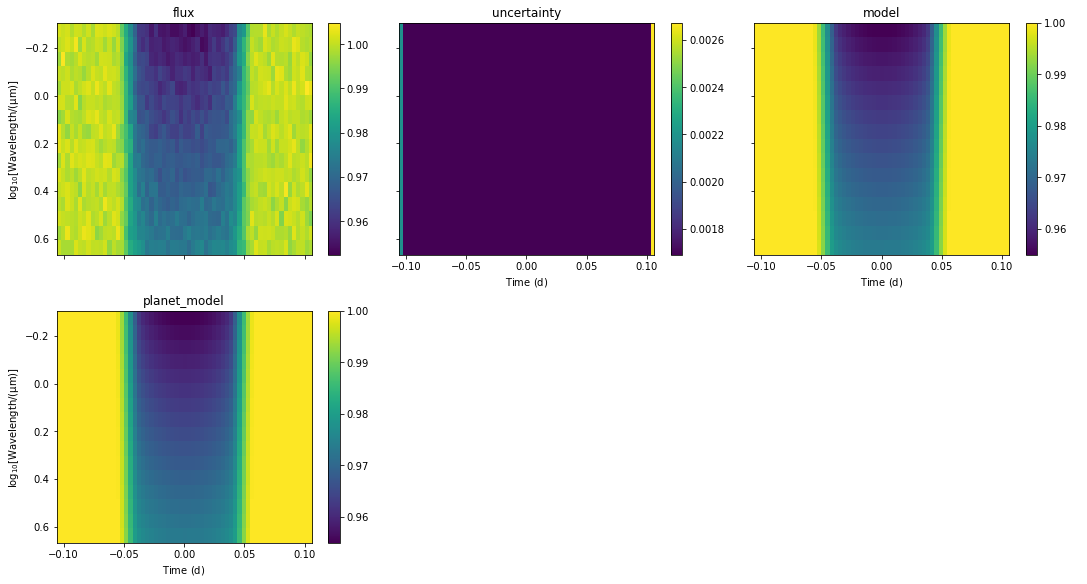

In [2]:
# create polynomial + transit rainbow:

r = SimulatedRainbow(signal_to_noise=100, dt=1 * u.minute, R=50)

# add transit:
r = r.inject_transit(
        planet_radius=np.linspace(0.2, 0.15, r.nwave))

# bin:
rbin5 = r.bin(nwavelengths=int(r.nwave/5), dt=5 * u.minute)
rbin10 = r.bin(nwavelengths=int(r.nwave/10), dt=5 * u.minute)
rbin11 = r.bin(nwavelengths=int(r.nwave/11), dt=5 * u.minute)
rbin15 = r.bin(nwavelengths=int(r.nwave/15), dt=5 * u.minute)

rbin5.imshow_quantities();
rbin10.imshow_quantities();
rbin15.imshow_quantities();

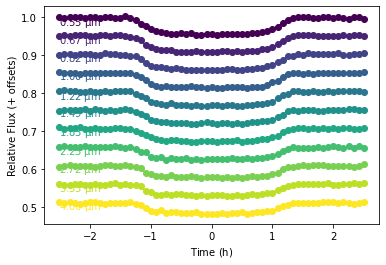

In [223]:
rbin11.plot()

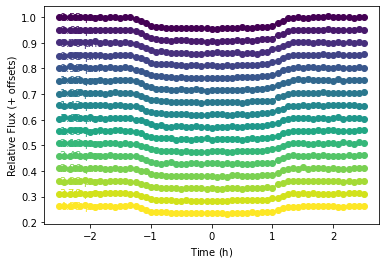

In [170]:
rbin15.plot()

### Try Separate Fitting with Transit Model

In [173]:
t = TransitModel()
t.initialize_empty_model()

t.setup_parameters(
#      period=Fitted(Uniform,testval=4.055259,lower=0.000009),
                  period=1,
                   epoch=Fitted(Uniform,lower=-0.05,upper=0.05),
                   stellar_radius = Fitted(Uniform, lower=0.8, upper=1.2,testval=1),
                   stellar_mass =Fitted(Uniform, lower=0.8, upper=1.2,testval=1),
                   radius_ratio=WavelikeFitted(Normal, mu=0.5, sigma=0.05),
                   impact_parameter=Fitted(ImpactParameter,ror=0.15,testval=0.44),
                   limb_darkening=Fitted(QuadLimbDark,testval=[0.05,0.35]),
                    baseline = Fitted(Uniform, lower=0.95,upper=1.05)
                )

t.summarize_parameters()

t.attach_data(rbin15)

t.choose_optimization_method("separate")
# print(t.optimization)

t.setup_lightcurves()

t.setup_likelihood()
print(t.pymc3_model[3])

stellar_radius =
  <🧮 Fitted Uniform(lower=0.8, upper=1.2, testval=1, name='stellar_radius') 🧮>

stellar_mass =
  <🧮 Fitted Uniform(lower=0.8, upper=1.2, testval=1, name='stellar_mass') 🧮>

radius_ratio =
  <🧮 WavelikeFitted Normal(mu=0.5, sigma=0.05, name='radius_ratio') for each wavelength 🧮>

period =
  <🧮 Fixed | 1 🧮>

epoch =
  <🧮 Fitted Uniform(lower=-0.05, upper=0.05, name='epoch') 🧮>

baseline =
  <🧮 Fitted Uniform(lower=0.95, upper=1.05, name='baseline') 🧮>

impact_parameter =
  <🧮 Fitted ImpactParameter(ror=0.15, testval=0.44, name='impact_parameter') 🧮>

limb_darkening =
  <🧮 Fitted QuadLimbDark(testval=[0.05, 0.35], name='limb_darkening') 🧮>



100%|███████████████████████████████████████| 16/16 [00:00<00:00, 161319.38it/s]


             epoch_w3_interval__ ~ TransformedDistribution
    impact_parameter_w3_impact__ ~ TransformedDistribution
    stellar_radius_w3_interval__ ~ TransformedDistribution
      stellar_mass_w3_interval__ ~ TransformedDistribution
limb_darkening_w3_quadlimbdark__ ~ TransformedDistribution
                 radius_ratio_w3 ~ Normal
          baseline_w3_interval__ ~ TransformedDistribution
                        epoch_w3 ~ Uniform
             impact_parameter_w3 ~ ImpactParameter
               stellar_radius_w3 ~ Uniform
                 stellar_mass_w3 ~ Uniform
               limb_darkening_w3 ~ QuadLimbDark
                     baseline_w3 ~ Uniform
               wavelength_3_data ~ Normal



🌈 Warning: invalid value encountered in log

KeyError: 'wavelength_1_data'

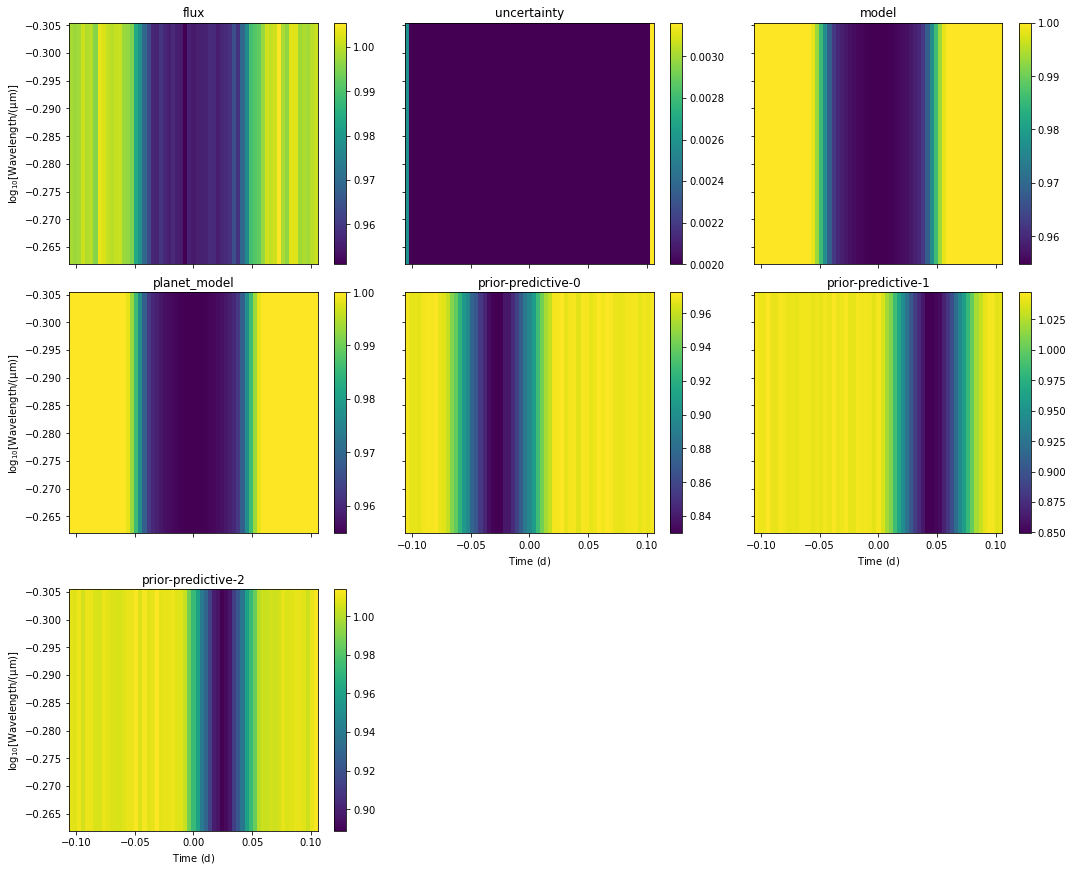

In [155]:
t.plot_priors()

In [174]:
t.sample()
t.summarize(round_to=7, fmt='wide')


🌈 Warning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.Multiprocess sampling (4 chains in 4 jobs)
NUTS: [baseline_w0, radius_ratio_w0, limb_darkening_w0, stellar_mass_w0, stellar_radius_w0, impact_parameter_w0, epoch_w0]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 26 seconds.

🌈 Warning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.Multiprocess sampling (4 chains in 4 jobs)
NUTS: [baseline_w1, radius_ratio_w1, limb_darkening_w1, stellar_mass_w1, stellar_radius_w1, impact_parameter_w1, epoch_w1]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.

🌈 Warning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.Multiprocess sampling (4 chains in 4 jobs)
NUTS: [baseline_w2, radius_ratio_w2, limb_darkening_w2, stellar_mass_w2, stellar_radius_w2, impact_parameter_w2, epoch_w2]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 32 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 35 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7912243491041353, but should be close to 0.9. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.

🌈 Warning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.Multiprocess sampling (4 chains in 4 jobs)
NUTS: [baseline_w3, radius_ratio_w3, limb_darkening_w3, stellar_mass_w3, stellar_radius_w3, impact_parameter_w3, epoch_w3]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 26 seconds.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.

🌈 Warning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.Multiprocess sampling (4 chains in 4 jobs)
NUTS: [baseline_w4, radius_ratio_w4, limb_darkening_w4, stellar_mass_w4, stellar_radius_w4, impact_parameter_w4, epoch_w4]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 25 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.

🌈 Warning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.Multiprocess sampling (4 chains in 4 jobs)
NUTS: [baseline_w5, radius_ratio_w5, limb_darkening_w5, stellar_mass_w5, stellar_radius_w5, impact_parameter_w5, epoch_w5]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 29 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.

🌈 Warning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.Multiprocess sampling (4 chains in 4 jobs)
NUTS: [baseline_w6, radius_ratio_w6, limb_darkening_w6, stellar_mass_w6, stellar_radius_w6, impact_parameter_w6, epoch_w6]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 24 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 17 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8386306645075874, but should be close to 0.9. Try to increase the number of tuning steps.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.

🌈 Warning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.Multiprocess sampling (4 chains in 4 jobs)
NUTS: [baseline_w7, radius_ratio_w7, limb_darkening_w7, stellar_mass_w7, stellar_radius_w7, impact_parameter_w7, epoch_w7]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 24 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.

🌈 Warning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.Multiprocess sampling (4 chains in 4 jobs)
NUTS: [baseline_w8, radius_ratio_w8, limb_darkening_w8, stellar_mass_w8, stellar_radius_w8, impact_parameter_w8, epoch_w8]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 30 seconds.
The acceptance probability does not match the target. It is 0.959667148121824, but should be close to 0.9. Try to increase the number of tuning steps.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.

🌈 Warning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.Multiprocess sampling (4 chains in 4 jobs)
NUTS: [baseline_w9, radius_ratio_w9, limb_darkening_w9, stellar_mass_w9, stellar_radius_w9, impact_parameter_w9, epoch_w9]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 20 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.

🌈 Warning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.Multiprocess sampling (4 chains in 4 jobs)
NUTS: [baseline_w10, radius_ratio_w10, limb_darkening_w10, stellar_mass_w10, stellar_radius_w10, impact_parameter_w10, epoch_w10]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 31 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.

🌈 Warning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.Multiprocess sampling (4 chains in 4 jobs)
NUTS: [baseline_w11, radius_ratio_w11, limb_darkening_w11, stellar_mass_w11, stellar_radius_w11, impact_parameter_w11, epoch_w11]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 36 seconds.
There were 12 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.

🌈 Warning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.Multiprocess sampling (4 chains in 4 jobs)
NUTS: [baseline_w12, radius_ratio_w12, limb_darkening_w12, stellar_mass_w12, stellar_radius_w12, impact_parameter_w12, epoch_w12]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 372 seconds.
There were 17 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.814649859874806, but should be close to 0.9. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.

🌈 Warning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.Multiprocess sampling (4 chains in 4 jobs)
NUTS: [baseline_w13, radius_ratio_w13, limb_darkening_w13, stellar_mass_w13, stellar_radius_w13, impact_parameter_w13, epoch_w13]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 506 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.

🌈 Warning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.Multiprocess sampling (4 chains in 4 jobs)
NUTS: [baseline_w14, radius_ratio_w14, limb_darkening_w14, stellar_mass_w14, stellar_radius_w14, impact_parameter_w14, epoch_w14]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2694 seconds.
There were 12 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.

🌈 Warning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.Multiprocess sampling (4 chains in 4 jobs)
NUTS: [baseline_w15, radius_ratio_w15, limb_darkening_w15, stellar_mass_w15, stellar_radius_w15, impact_parameter_w15, epoch_w15]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1811 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9630559924757301, but should be close to 0.9. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.



🌈 Warning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample

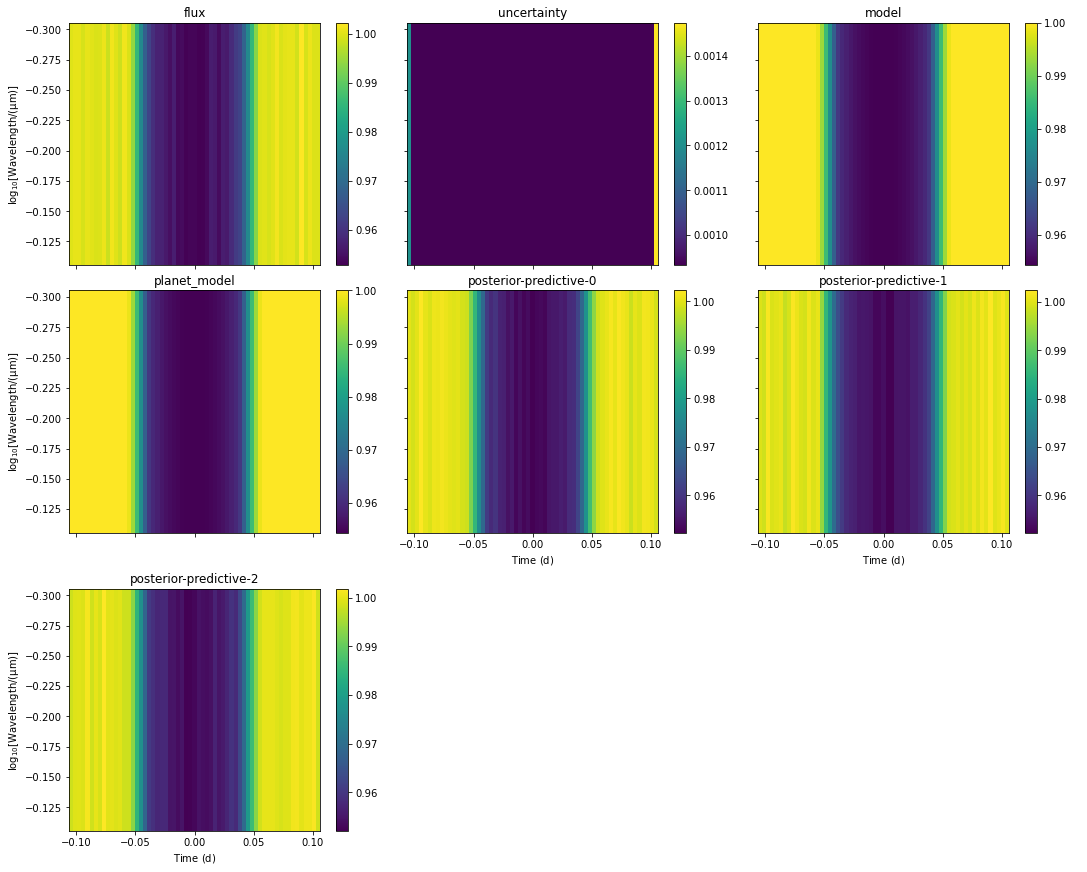

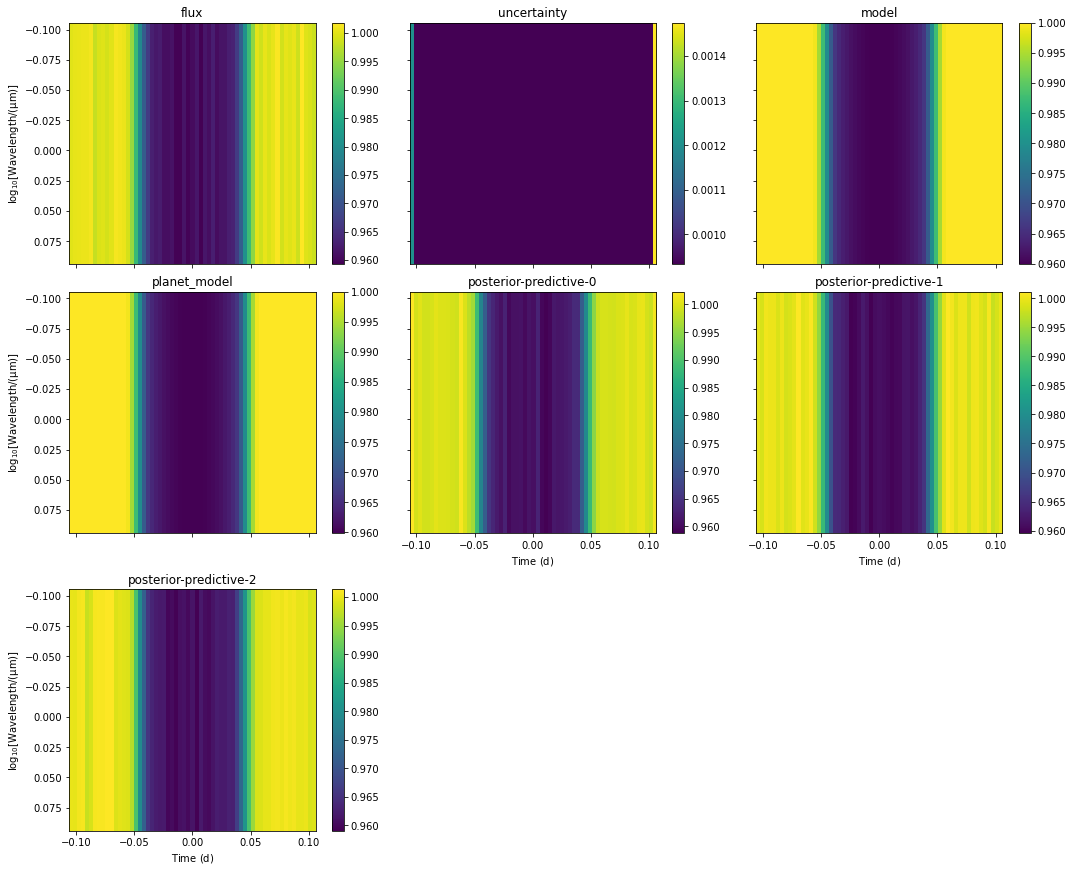

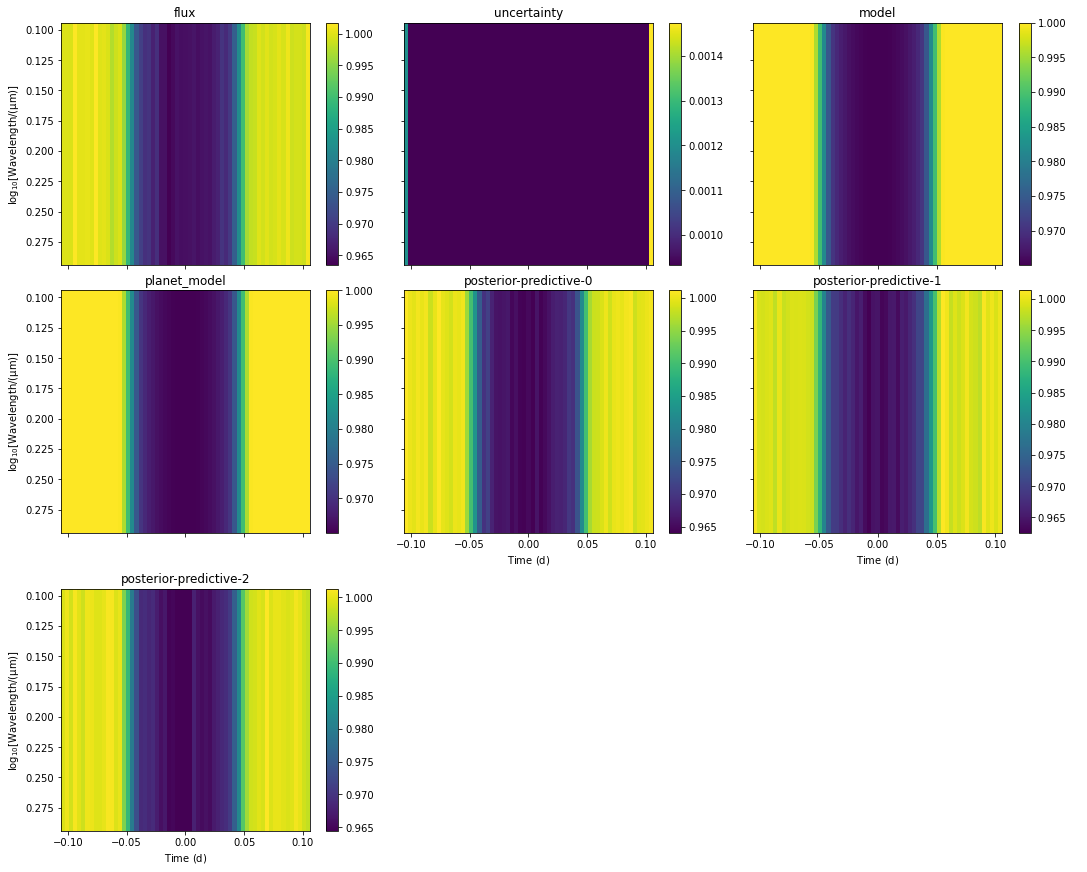

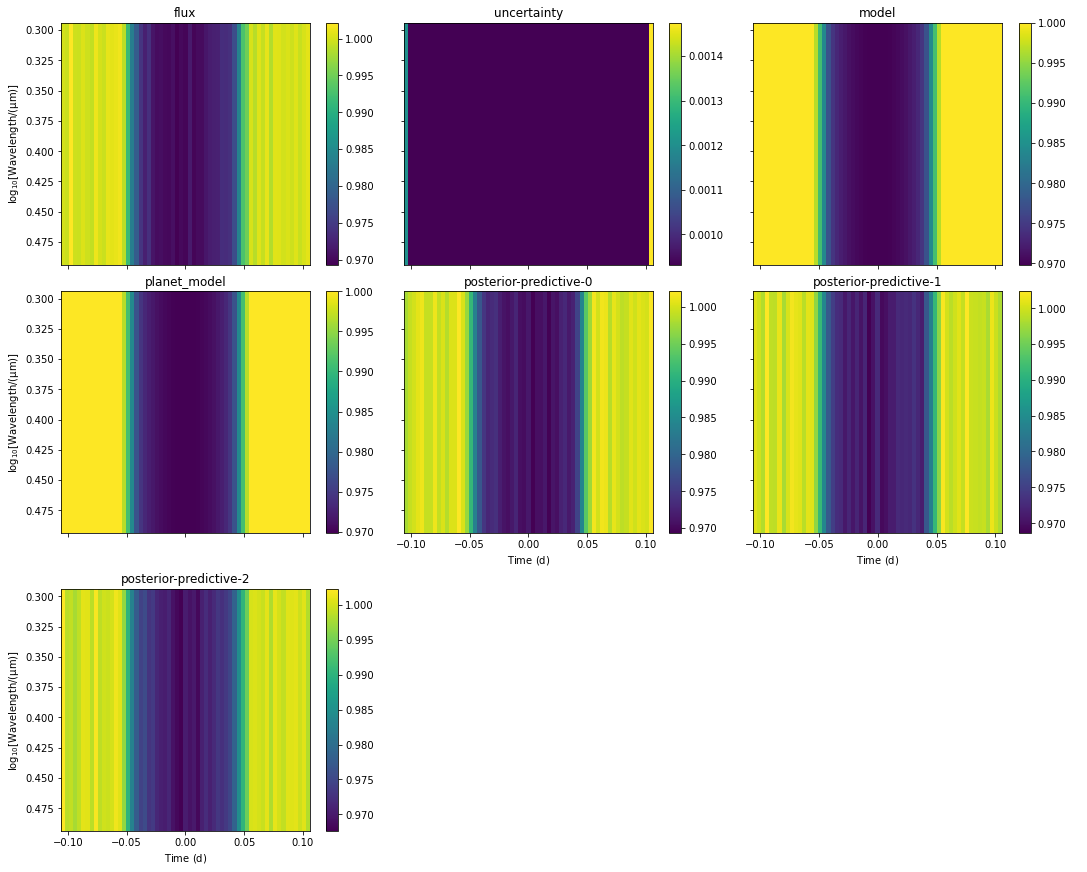

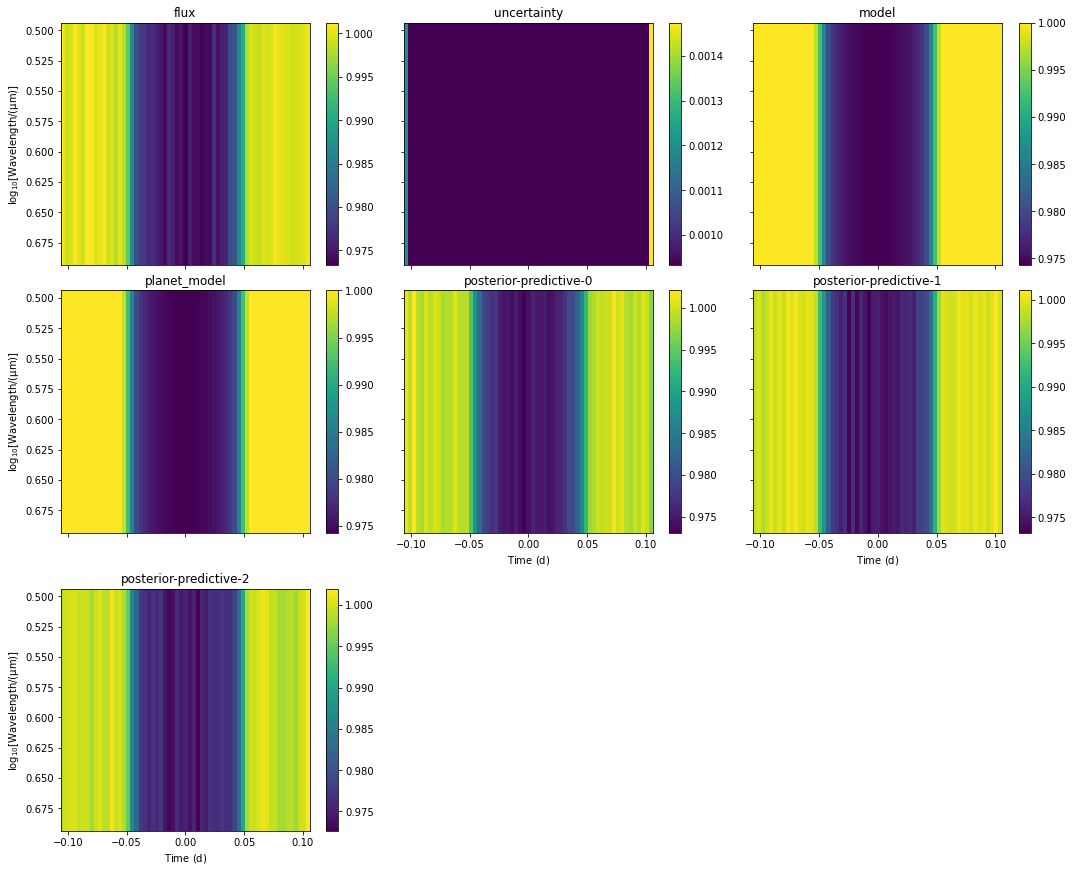

In [30]:
t.plot_posteriors()

In [14]:
def plot_2d_lightcurves(self):
    fig, ax = plt.subplots(figsize=(7,7))
    from matplotlib.pyplot import cm as cmap

    posterior_predictive_traces = self.sample_posterior(ndraws=50)

    for j, (mod, trace, summary, posterior_predictive_trace) in enumerate(zip(self.pymc3_model, self.trace, self.summary, posterior_predictive_traces)):
        if self.optimization == 'separate':
            data = self.get_data(j)
            spacing = 3 * np.nanstd(self.get_data(0).flux)
        else:
            data = self.get_data()
            spacing = 3 * np.nanstd(data.flux)

        color=cmap.viridis(np.linspace(0,1,data.nwave))

        posterior_means = summary['mean']

        # spacing = ax._most_recent_chromatic_plot_spacing
        for i, w in enumerate(data.wavelength):
            firstplot = True
            transit_params = self.extract_mean_posteriors(summary, i+j)
            transit = self.transit_model(transit_params)
            poly = []
#             transit_params = self.chromatic_models['transit'].extract_mean_posteriors(summary, i+j)#cm.chromatic_models['transit'].extract_mean_posteriors(summary, i+j)
#             poly_params = self.chromatic_models['polynomial'].extract_mean_posteriors(summary, i+j)#cm.chromatic_models['polynomial'].extract_mean_posteriors(summary, i+j)

#             poly = self.chromatic_models['polynomial'].polynomial_model(poly_params)
#             transit = self.chromatic_models['transit'].transit_model(transit_params)

            for k in range(50):
                if firstplot:
                    plt.plot(data.time, (-spacing*(i+j)) + posterior_predictive_trace[f'wavelength_{i+j}_data'][k],color='gray',alpha=0.3,label='Posterior Sample (n=50)')
                    firstplot=False
                else:
                    plt.plot(data.time, (-spacing*(i+j)) + posterior_predictive_trace[f'wavelength_{i+j}_data'][k],color='gray',alpha=0.3)

            plt.plot(data.time,(transit) + (-spacing*(i+j)),color='cyan')
            plt.plot(data.time, data.flux[i] + (-spacing*(i+j)),'.')
            plt.text(data.time[0].to_value(), data.flux[i][0] + (-spacing*(i+j)) + 0.01, s="%.2f"%w.to_value())

    plt.title(self.optimization)
    plt.ylabel("Relative Flux + offset")
    plt.xlabel("Time from Transit Epoch")
    plt.legend(loc='lower right',fontsize=8)
    plt.show()
    plt.close()
    


🌈 Warning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample

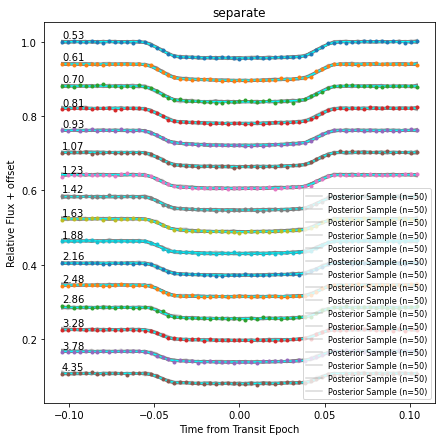

In [175]:
plot_2d_lightcurves(t)

## Try White Light Fit

In [187]:
# need to reinitialise model due to known issue with separate wavelength-fitting
t3 = TransitModel()
t3.initialize_empty_model()

t3.setup_parameters(
#      period=Fitted(Uniform,testval=4.055259,lower=0.000009),
                  period=1,
                   epoch=Fitted(Uniform,lower=-0.05,upper=0.05),
                   stellar_radius = Fitted(Uniform, lower=0.8, upper=1.2,testval=1),
                   stellar_mass =Fitted(Uniform, lower=0.8, upper=1.2,testval=1),
                   radius_ratio=WavelikeFitted(Normal, mu=0.5, sigma=0.05),
                   impact_parameter=Fitted(ImpactParameter,ror=0.15,testval=0.44),
                   limb_darkening=Fitted(QuadLimbDark,testval=[0.05,0.35]),
                    baseline = Fitted(Uniform, lower=0.95,upper=1.05)
                )

t3.summarize_parameters()

t3.attach_data(r)

t3.choose_optimization_method("white_light")
# print(t.optimization)

t3.setup_lightcurves()

t3.setup_likelihood()
print(t3.pymc3_model)

stellar_radius =
  <🧮 Fitted Uniform(lower=0.8, upper=1.2, testval=1, name='stellar_radius') 🧮>

stellar_mass =
  <🧮 Fitted Uniform(lower=0.8, upper=1.2, testval=1, name='stellar_mass') 🧮>

radius_ratio =
  <🧮 WavelikeFitted Normal(mu=0.5, sigma=0.05, name='radius_ratio') for each wavelength 🧮>

period =
  <🧮 Fixed | 1 🧮>

epoch =
  <🧮 Fitted Uniform(lower=-0.05, upper=0.05, name='epoch') 🧮>

baseline =
  <🧮 Fitted Uniform(lower=0.95, upper=1.05, name='baseline') 🧮>

impact_parameter =
  <🧮 Fitted ImpactParameter(ror=0.15, testval=0.44, name='impact_parameter') 🧮>

limb_darkening =
  <🧮 Fitted QuadLimbDark(testval=[0.05, 0.35], name='limb_darkening') 🧮>




🌈 Warning: Mean of empty slice.
🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: Mean of empty slice.
100%|███████████████████████████████████████████| 1/1 [00:00<00:00, 5356.71it/s]

🌈 Warning: Mean of empty slice.
🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: Mean of empty slice.
🌈 Warning: invalid value encountered in double_scalars

             epoch_interval__ ~ TransformedDistribution
    impact_parameter_impact__ ~ TransformedDistribution
    stellar_radius_interval__ ~ TransformedDistribution
      stellar_mass_interval__ ~ TransformedDistribution
limb_darkening_quadlimbdark__ ~ TransformedDistribution
              radius_ratio_w0 ~ Normal
          baseline_interval__ ~ TransformedDistribution
                        epoch ~ Uniform
             impact_parameter ~ ImpactParameter
               stellar_radius ~ Uniform
                 stellar_mass ~ Uniform
               limb_darkening ~ QuadLimbDark
                     baseline ~ Uniform
            wavelength_0_data ~ Normal


In [188]:
t3.sample()
t3.summarize(round_to=7, fmt='wide')


🌈 Warning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.Multiprocess sampling (4 chains in 4 jobs)
NUTS: [baseline, radius_ratio_w0, limb_darkening, stellar_mass, stellar_radius, impact_parameter, epoch]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 62 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
There were 16 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


In [192]:
t3.summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
radius_ratio_w0,0.177409,0.000715,0.176024,0.178721,0.000017,0.000012,1803.050895,1922.645714,1.004452
epoch,-0.000069,0.000073,-0.000207,0.000072,0.000001,0.000001,2788.737116,2269.855725,1.002583
impact_parameter,0.063515,0.045767,0.000055,0.144920,0.000979,0.000692,1748.298423,1272.132321,1.001087
stellar_radius,1.176455,0.014171,1.153581,1.199966,0.000573,0.000406,519.165176,521.850315,1.005287
stellar_mass,0.854653,0.031059,0.802632,0.905478,0.001231,0.000871,575.402167,544.593746,1.004716
limb_darkening[0],0.333350,0.050967,0.241131,0.426632,0.001213,0.000878,1667.818918,1937.405931,1.006394
limb_darkening[1],0.005716,0.111247,-0.189156,0.205616,0.003017,0.002134,1317.275840,1358.853331,1.007104
baseline,1.000090,0.000078,0.999937,1.000231,0.000002,0.000001,2584.366898,2282.635961,1.003050


NameError: name 't3' is not defined

### Try a Separate Wavelength fit using White Light Fitted Parameters

In [194]:
t4 = TransitModel()
t4.initialize_empty_model()

t4.setup_parameters(
#      period=Fitted(Uniform,testval=4.055259,lower=0.000009),
                  period=wl.results['period'],
                   epoch=WavelikeFitted(mu=wl.results['epoch'],sigma=wl.results['epoch_lower_error']),
                   stellar_radius = 1.176455,
                   stellar_mass =0.854653,
                   radius_ratio=WavelikeFitted(Normal, mu=0.177409, sigma=0.05),
                   impact_parameter=0.063515,
                   limb_darkening=WavelikeFitted(QuadLimbDark,testval=[0.333350,0.005716]),
                    baseline = WavelikeFitted(Normal, mu=1.000090, sigma=0.000078)
                )

t4.summarize_parameters()

t4.attach_data(rbin15)

t4.choose_optimization_method("separate")
# print(t.optimization)

t4.setup_lightcurves()

t4.setup_likelihood()
print(t.pymc3_model[3])

stellar_radius =
  <🧮 Fixed | 1.176455 🧮>

stellar_mass =
  <🧮 Fixed | 0.854653 🧮>

radius_ratio =
  <🧮 WavelikeFitted Normal(mu=0.177409, sigma=0.05, name='radius_ratio') for each wavelength 🧮>

period =
  <🧮 Fixed | 1 🧮>

epoch =
  <🧮 Fixed | -6.9e-05 🧮>

baseline =
  <🧮 WavelikeFitted Normal(mu=1.00009, sigma=7.8e-05, name='baseline') for each wavelength 🧮>

impact_parameter =
  <🧮 Fixed | 0.063515 🧮>

limb_darkening =
  <🧮 WavelikeFitted QuadLimbDark(testval=[0.33335, 0.005716], name='limb_darkening') for each wavelength 🧮>



100%|███████████████████████████████████████| 16/16 [00:00<00:00, 280790.23it/s]


             epoch_w3_interval__ ~ TransformedDistribution
    impact_parameter_w3_impact__ ~ TransformedDistribution
    stellar_radius_w3_interval__ ~ TransformedDistribution
      stellar_mass_w3_interval__ ~ TransformedDistribution
limb_darkening_w3_quadlimbdark__ ~ TransformedDistribution
                 radius_ratio_w3 ~ Normal
          baseline_w3_interval__ ~ TransformedDistribution
                        epoch_w3 ~ Uniform
             impact_parameter_w3 ~ ImpactParameter
               stellar_radius_w3 ~ Uniform
                 stellar_mass_w3 ~ Uniform
               limb_darkening_w3 ~ QuadLimbDark
                     baseline_w3 ~ Uniform
               wavelength_3_data ~ Normal


In [195]:
t4.sample()
t4.summarize(round_to=7, fmt='wide')


🌈 Warning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.Multiprocess sampling (4 chains in 4 jobs)
NUTS: [baseline_w0, radius_ratio_w0, limb_darkening_w0]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 8 seconds.

🌈 Warning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.Multiprocess sampling (4 chains in 4 jobs)
NUTS: [baseline_w1, radius_ratio_w1, limb_darkening_w1]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 8 seconds.

🌈 Warning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.Multiprocess sampling (4 chains in 4 jobs)
NUTS: [baseline_w2, radius_ratio_w2, limb_darkening_w2]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 9 seconds.
The acceptance probability does not match the target. It is 0.9604957841183012, but should be close to 0.9. Try to increase the number of tuning steps.

🌈 Warning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.Multiprocess sampling (4 chains in 4 jobs)
NUTS: [baseline_w3, radius_ratio_w3, limb_darkening_w3]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 8 seconds.

🌈 Warning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.Multiprocess sampling (4 chains in 4 jobs)
NUTS: [baseline_w4, radius_ratio_w4, limb_darkening_w4]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 9 seconds.

🌈 Warning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.Multiprocess sampling (4 chains in 4 jobs)
NUTS: [baseline_w5, radius_ratio_w5, limb_darkening_w5]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 8 seconds.
The acceptance probability does not match the target. It is 0.9594808968757367, but should be close to 0.9. Try to increase the number of tuning steps.

🌈 Warning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.Multiprocess sampling (4 chains in 4 jobs)
NUTS: [baseline_w6, radius_ratio_w6, limb_darkening_w6]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 9 seconds.
The acceptance probability does not match the target. It is 0.966613177428861, but should be close to 0.9. Try to increase the number of tuning steps.

🌈 Warning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.Multiprocess sampling (4 chains in 4 jobs)
NUTS: [baseline_w7, radius_ratio_w7, limb_darkening_w7]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 9 seconds.
The acceptance probability does not match the target. It is 0.9657320912180892, but should be close to 0.9. Try to increase the number of tuning steps.

🌈 Warning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.Multiprocess sampling (4 chains in 4 jobs)
NUTS: [baseline_w8, radius_ratio_w8, limb_darkening_w8]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.

🌈 Warning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.Multiprocess sampling (4 chains in 4 jobs)
NUTS: [baseline_w9, radius_ratio_w9, limb_darkening_w9]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 8 seconds.

🌈 Warning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.Multiprocess sampling (4 chains in 4 jobs)
NUTS: [baseline_w10, radius_ratio_w10, limb_darkening_w10]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 9 seconds.

🌈 Warning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.Multiprocess sampling (4 chains in 4 jobs)
NUTS: [baseline_w11, radius_ratio_w11, limb_darkening_w11]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 8 seconds.

🌈 Warning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.Multiprocess sampling (4 chains in 4 jobs)
NUTS: [baseline_w12, radius_ratio_w12, limb_darkening_w12]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 9 seconds.

🌈 Warning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.Multiprocess sampling (4 chains in 4 jobs)
NUTS: [baseline_w13, radius_ratio_w13, limb_darkening_w13]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 8 seconds.

🌈 Warning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.Multiprocess sampling (4 chains in 4 jobs)
NUTS: [baseline_w14, radius_ratio_w14, limb_darkening_w14]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 8 seconds.

🌈 Warning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.Multiprocess sampling (4 chains in 4 jobs)
NUTS: [baseline_w15, radius_ratio_w15, limb_darkening_w15]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 9 seconds.


## Try Simultaneous Transit Fit 

In [227]:
# need to reinitialise model due to known issue with separate wavelength-fitting
t2 = TransitModel()
t2.initialize_empty_model()

t2.setup_parameters(
#      period=Fitted(Uniform,testval=4.055259,lower=0.000009),
                  period=1,
                   epoch=Fitted(Uniform,lower=-0.05,upper=0.05),
                   stellar_radius = Fitted(Uniform, lower=0.99, upper=1.01,testval=1),
                   stellar_mass =Fitted(Uniform, lower=0.99, upper=1.01,testval=1),
                   radius_ratio=WavelikeFitted(Normal, mu=0.17, sigma=0.05),
                   impact_parameter=Fitted(ImpactParameter,ror=0.2,testval=0.44),
                   limb_darkening=WavelikeFitted(QuadLimbDark,testval=[0.05,0.35]),
                    baseline = WavelikeFitted(Uniform, lower=0.99,upper=1.01)
                )

t2.summarize_parameters()

t2.attach_data(rbin11)

t2.choose_optimization_method("simultaneous")

t2.setup_lightcurves()

t2.setup_likelihood()
print(t2.pymc3_model)

stellar_radius =
  <🧮 Fitted Uniform(lower=0.8, upper=1.2, testval=1, name='stellar_radius') 🧮>

stellar_mass =
  <🧮 Fitted Uniform(lower=0.8, upper=1.2, testval=1, name='stellar_mass') 🧮>

radius_ratio =
  <🧮 WavelikeFitted Normal(mu=0.5, sigma=0.05, name='radius_ratio') for each wavelength 🧮>

period =
  <🧮 Fixed | 1 🧮>

epoch =
  <🧮 Fitted Uniform(lower=-0.05, upper=0.05, name='epoch') 🧮>

baseline =
  <🧮 WavelikeFitted Uniform(lower=0.95, upper=1.05, name='baseline') for each wavelength 🧮>

impact_parameter =
  <🧮 Fitted ImpactParameter(ror=0.15, testval=0.44, name='impact_parameter') 🧮>

limb_darkening =
  <🧮 WavelikeFitted QuadLimbDark(testval=[0.05, 0.35], name='limb_darkening') for each wavelength 🧮>



100%|████████████████████████████████████████| 11/11 [00:00<00:00, 58848.65it/s]


                 epoch_interval__ ~ TransformedDistribution
        impact_parameter_impact__ ~ TransformedDistribution
        stellar_radius_interval__ ~ TransformedDistribution
          stellar_mass_interval__ ~ TransformedDistribution
 limb_darkening_w0_quadlimbdark__ ~ TransformedDistribution
                  radius_ratio_w0 ~ Normal
           baseline_w0_interval__ ~ TransformedDistribution
 limb_darkening_w1_quadlimbdark__ ~ TransformedDistribution
                  radius_ratio_w1 ~ Normal
           baseline_w1_interval__ ~ TransformedDistribution
 limb_darkening_w2_quadlimbdark__ ~ TransformedDistribution
                  radius_ratio_w2 ~ Normal
           baseline_w2_interval__ ~ TransformedDistribution
 limb_darkening_w3_quadlimbdark__ ~ TransformedDistribution
                  radius_ratio_w3 ~ Normal
           baseline_w3_interval__ ~ TransformedDistribution
 limb_darkening_w4_quadlimbdark__ ~ TransformedDistribution
                  radius_ratio_w4 ~ Normal
     


🌈 Warning: invalid value encountered in log

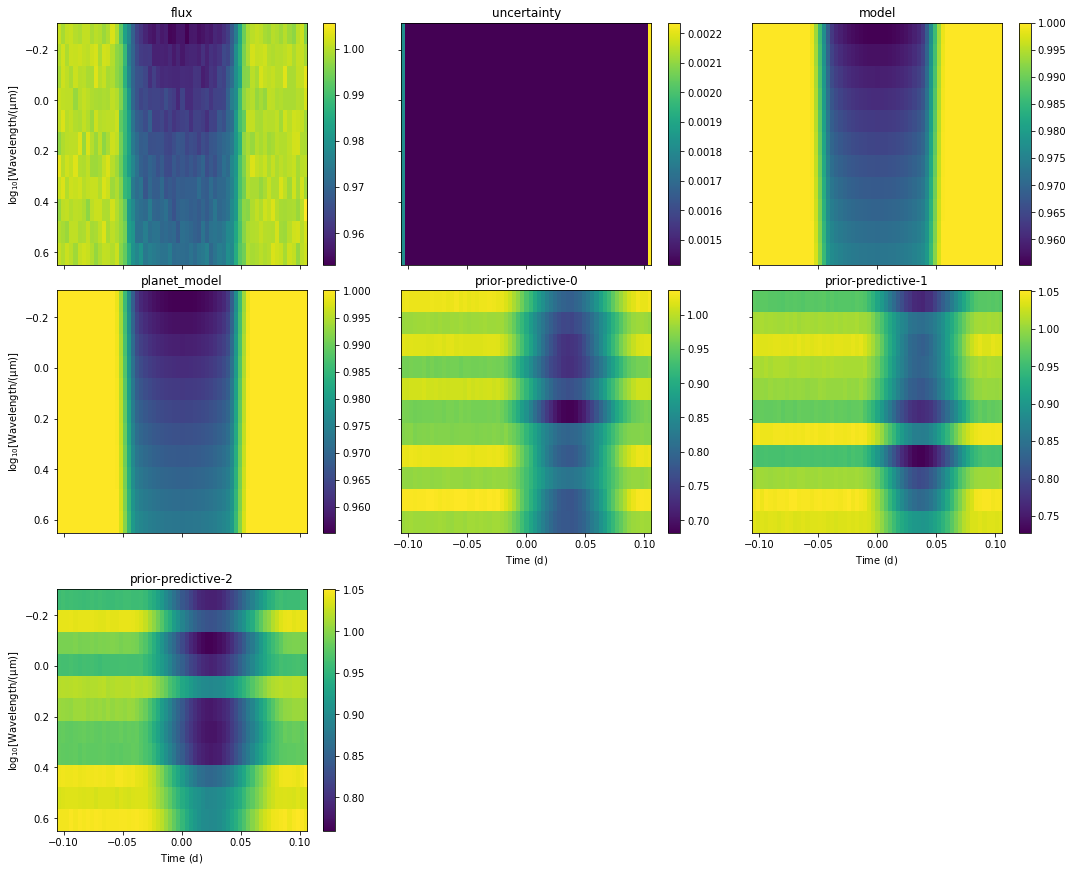

In [228]:
t2.plot_priors()

In [229]:
t2.sample(tune=12000, draws=12000, cores=12, chains=4)
t2.summarize(round_to=7, fmt='wide')


🌈 Warning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.Multiprocess sampling (4 chains in 12 jobs)
NUTS: [baseline_w10, radius_ratio_w10, limb_darkening_w10, baseline_w9, radius_ratio_w9, limb_darkening_w9, baseline_w8, radius_ratio_w8, limb_darkening_w8, baseline_w7, radius_ratio_w7, limb_darkening_w7, baseline_w6, radius_ratio_w6, limb_darkening_w6, baseline_w5, radius_ratio_w5, limb_darkening_w5, baseline_w4, radius_ratio_w4, limb_darkening_w4, baseline_w3, radius_ratio_w3, limb_darkening_w3, baseline_w2, radius_ratio_w2, limb_darkening_w2, baseline_w1, radius_ratio_w1, limb_darkening_w1, baseline_w0, radius_ratio_w0, limb_darkening_w0, stellar_mass, stellar_radius, impact_parameter, epoch]


Sampling 4 chains for 12_000 tune and 12_000 draw iterations (48_000 + 48_000 draws total) took 70549 seconds.
There were 215 divergences after tuning. Increase `target_accept` or reparameterize.
There were 8968 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8174829279137645, but should be close to 0.9. Try to increase the number of tuning steps.
There were 418 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1994 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8109223724383543, but should be close to 0.9. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [231]:
t2.summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
radius_ratio_w0,0.343375,0.288988,0.190919,0.967714,0.126450,0.094944,18.746893,26.472280,1.522909
radius_ratio_w1,0.443201,0.494038,0.176985,1.510931,0.215867,0.162053,19.536180,26.472280,1.528078
radius_ratio_w2,-0.053327,0.484881,-1.102343,0.224099,0.210971,0.158292,19.957102,26.472280,1.526978
radius_ratio_w3,-0.041098,0.443272,-0.999162,0.198539,0.193642,0.145365,19.439783,26.472280,1.528747
radius_ratio_w4,0.388201,0.410873,0.172614,1.275789,0.179847,0.135044,18.829784,26.472280,1.523354
radius_ratio_w5,0.168190,0.011010,0.144243,0.176712,0.004844,0.003644,8.422720,26.472280,1.393388
radius_ratio_w6,-0.085488,0.513802,-1.196401,0.198316,0.224120,0.168212,19.463672,26.472280,1.527366
radius_ratio_w7,0.177412,0.018269,0.165167,0.220864,0.007123,0.005369,21.339581,26.472280,1.526476
radius_ratio_w8,0.057250,0.213627,-0.404981,0.180550,0.092887,0.069687,20.036543,26.472280,1.524912
radius_ratio_w9,0.063121,0.190431,-0.347572,0.164593,0.083498,0.062711,9.202465,26.472280,1.345262



🌈 Warning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample

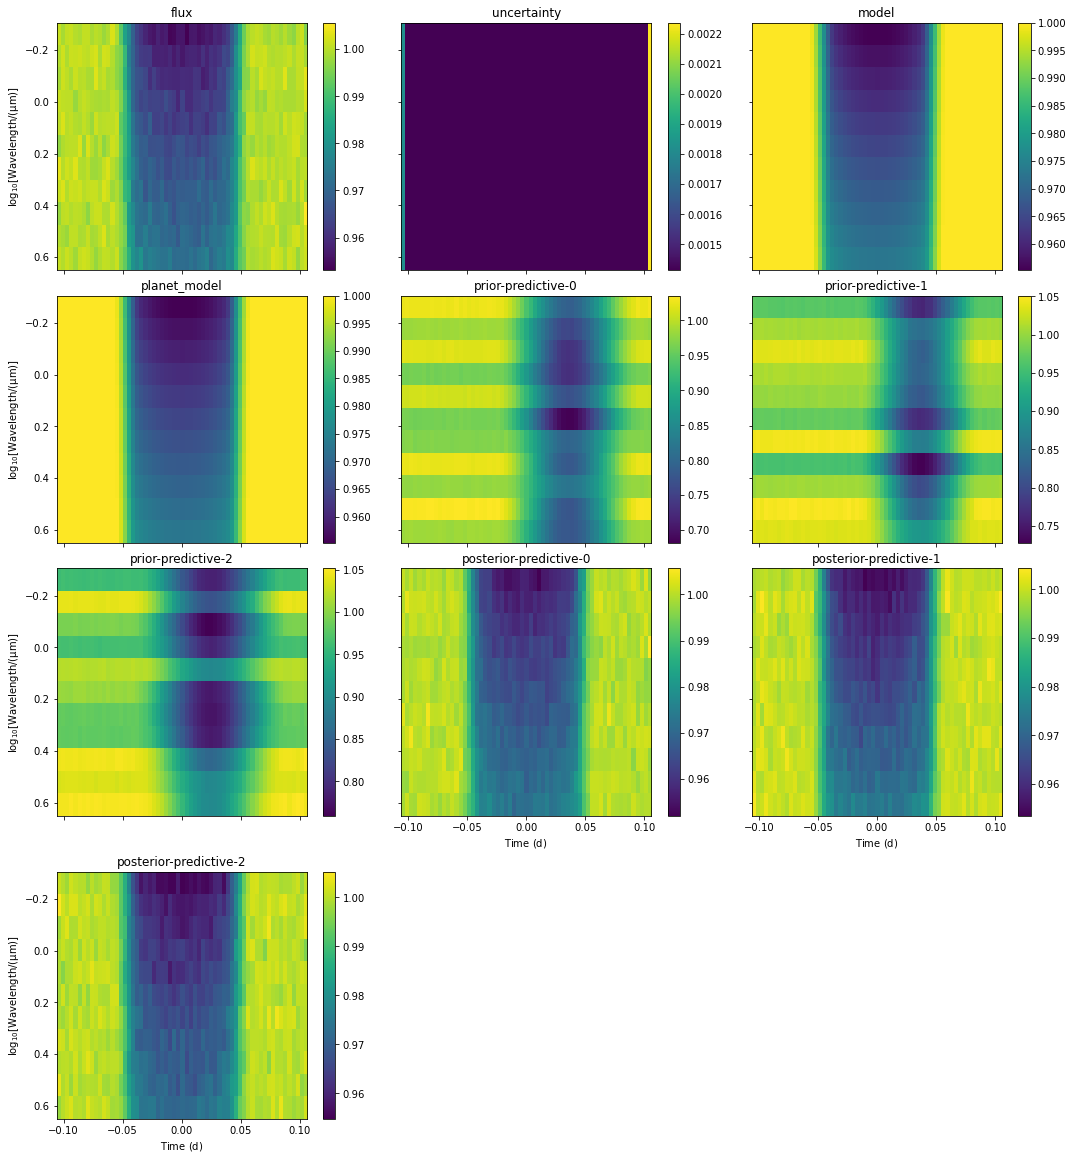

In [232]:
t2.plot_posteriors()

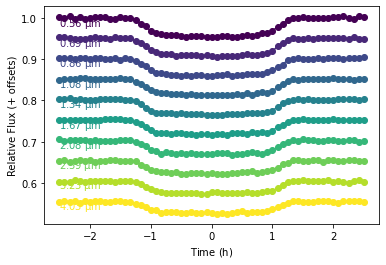

In [216]:
t2.plot_lightcurves(trace=t2.trace)

In [217]:
t2.summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
radius_ratio_w0,0.200542,0.001345,0.198022,0.203081,6.900000e-06,4.900000e-06,37722.498904,32307.392297,1.000069
radius_ratio_w1,0.194208,0.001384,0.191654,0.196850,7.000000e-06,5.000000e-06,38840.829569,29531.017001,1.000163
radius_ratio_w2,0.190389,0.001377,0.187811,0.192969,6.900000e-06,4.900000e-06,40139.713119,30338.222998,0.999982
radius_ratio_w3,0.185616,0.001335,0.183162,0.188193,6.500000e-06,4.600000e-06,41826.117910,32148.491279,1.000056
radius_ratio_w4,0.180203,0.001347,0.177631,0.182725,6.400000e-06,4.500000e-06,44482.433789,30089.262606,1.000188
radius_ratio_w5,0.176078,0.001358,0.173540,0.178638,6.400000e-06,4.600000e-06,44439.573133,32509.039509,1.000065
radius_ratio_w6,0.170698,0.001465,0.167884,0.173388,6.800000e-06,4.800000e-06,46196.861876,34774.603777,1.000125
radius_ratio_w7,0.164429,0.001439,0.161710,0.167102,7.000000e-06,4.900000e-06,42744.476547,32630.462647,1.000035
radius_ratio_w8,0.160690,0.001501,0.157932,0.163568,6.800000e-06,4.800000e-06,48957.708592,31833.993228,1.000071
radius_ratio_w9,0.155106,0.001521,0.152246,0.157945,7.000000e-06,5.000000e-06,46604.318526,31208.892537,1.000055


## Compare Simultaneous and Separate Fits

In [202]:
def plot_transmisison_spectrum(self,ax=None, model=None,**kw):
    if ax is None:
        ax = plt.subplot()
    plt.sca(ax)
    ws, rr, drr = [],[],[]
    
    if self.optimization == "separate":
        summaries = self.summary
        datas = [self.get_data(i) for i in range(self.data.nwave)]
        wavelengths = [d.wavelength[0] for d in datas]
    else:
        summaries = [self.summary]
        datas = [self.get_data()]
        wavelengths = [self.get_data().wavelength]
        
    for i, (summary, data, wavelength) in enumerate(zip(summaries, datas, wavelengths)):
        posterior_means = summary['mean']
        posterior_sd = summary['sd']
        for w, wav in enumerate(data.wavelength):
            ws.append(wav.to_value())
            if "radius_ratio" in posterior_means.index:
                rr.append(posterior_means["radius_ratio"])
                drr.append(posterior_sd["radius_ratio"])
            elif f"radius_ratio_w{i+w}" in posterior_means.index:
                rr.append(posterior_means[f"radius_ratio_w{i+w}"])
                drr.append(posterior_sd[f"radius_ratio_w{i+w}"])
                
    if model is not None:
        plt.plot(model['wavelength'],model['rr'],'k',alpha=0.3,label="Model Spectrum")
                
    plt.errorbar(ws,rr,drr,alpha=0.5,capsize=5,linestyle='None',c='gray')
    plt.plot(ws,rr,'.',markersize=8,**kw)
    plt.title("Transmission Spectrum")
    plt.ylabel("Rp/R*")
    plt.xlabel("Wavelength")
    plt.legend()



🌈 Warning: Mean of empty slice.
🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: Mean of empty slice.
🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: Mean of empty slice.
🌈 Warning: invalid value encountered in double_scalars
🌈 Warning: Mean of empty slice.
🌈 Warning: invalid value encountered in double_scalars

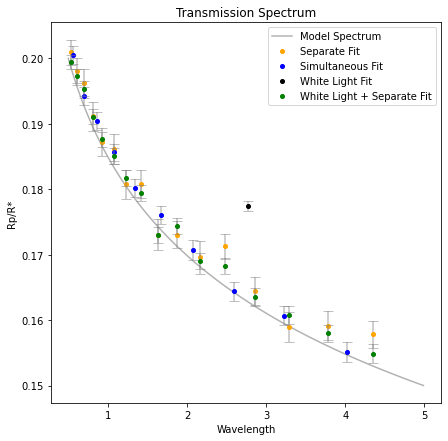

In [221]:
fig, ax = plt.subplots(figsize=(7,7))
# model = {'wavelength':np.logspace(np.log10(r.wavelength[0].to_value()),np.log10(r.wavelength[-1].to_value()),100),'rr':np.linspace(0.2, 0.15, 100)}
model = {'wavelength':r.wavelength,'rr':np.linspace(0.2, 0.15, r.nwave)}
# model2 = {'wavelength':rbin10.wavelength,'rr':np.linspace(0.2, 0.15, rbin10.nwave)}
plot_transmisison_spectrum(t, ax, model=model, color="orange",label="Separate Fit")
plot_transmisison_spectrum(t2, ax, color='blue', label="Simultaneous Fit")
plot_transmisison_spectrum(t3, ax, color='k', label="White Light Fit")
plot_transmisison_spectrum(t4, ax, color='green', label="White Light + Separate Fit")

In [230]:
t2.summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
radius_ratio_w0,0.343375,0.288988,0.190919,0.967714,0.126450,0.094944,18.746893,26.472280,1.522909
radius_ratio_w1,0.443201,0.494038,0.176985,1.510931,0.215867,0.162053,19.536180,26.472280,1.528078
radius_ratio_w2,-0.053327,0.484881,-1.102343,0.224099,0.210971,0.158292,19.957102,26.472280,1.526978
radius_ratio_w3,-0.041098,0.443272,-0.999162,0.198539,0.193642,0.145365,19.439783,26.472280,1.528747
radius_ratio_w4,0.388201,0.410873,0.172614,1.275789,0.179847,0.135044,18.829784,26.472280,1.523354
radius_ratio_w5,0.168190,0.011010,0.144243,0.176712,0.004844,0.003644,8.422720,26.472280,1.393388
radius_ratio_w6,-0.085488,0.513802,-1.196401,0.198316,0.224120,0.168212,19.463672,26.472280,1.527366
radius_ratio_w7,0.177412,0.018269,0.165167,0.220864,0.007123,0.005369,21.339581,26.472280,1.526476
radius_ratio_w8,0.057250,0.213627,-0.404981,0.180550,0.092887,0.069687,20.036543,26.472280,1.524912
radius_ratio_w9,0.063121,0.190431,-0.347572,0.164593,0.083498,0.062711,9.202465,26.472280,1.345262


## Add polynomial

In [2]:
r = SimulatedRainbow(signal_to_noise=100, dt=1 * u.minute, R=50)
r.timelike['x'] = np.linspace(-5,5,r.ntime) + [np.random.normal(0, 2) for c in range(r.ntime)]
r.fluxlike['bkg'] = (300 * np.ones(np.shape(r.flux))) + [np.random.normal(0, 2) for c in range(r.ntime)]
for i in range(r.ntime):
    r.bkg[:,i] = r.bkg[:,i] + (r.wavelength.to_value())
# bin:
rbin5 = r.bin(nwavelengths=int(r.nwave/5), dt=5 * u.minute)

In [3]:
np.shape(r.bkg), np.shape(r.wavelength), np.shape(r.flux)

((116, 300), (116,), (116, 300))

In [21]:
# create wavelength-dep linear model:
poly=[]

for i in range(rbin5.nwave):
    print(0.00001*i)
    poly.append((0.00001*i*rbin5.bkg[i,:]))# + (0.01*i))

rbin5.flux = rbin5.flux + poly
    
rbin5.fluxlike['polynomial_model'] = np.array(poly)
# rbin5.imshow_quantities();

0.0
1e-05
2e-05
3.0000000000000004e-05
4e-05


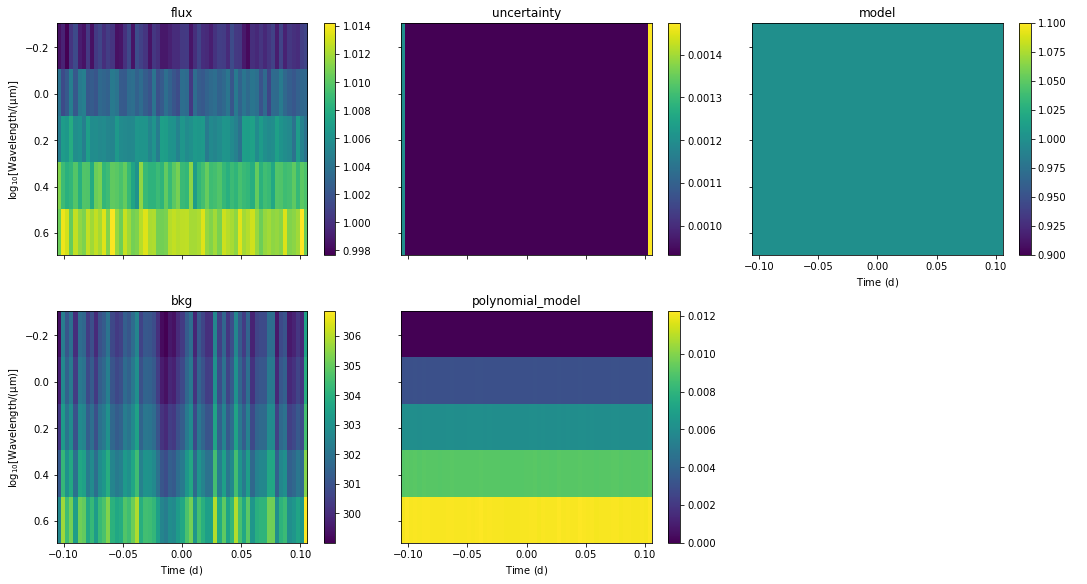

In [5]:
rbin5.imshow_quantities();

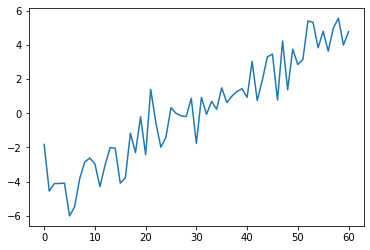

In [6]:
plt.plot(rbin5.x)

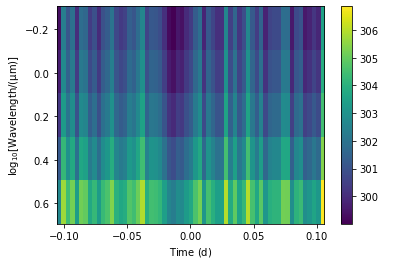

In [7]:
rbin5.imshow(quantity='bkg');

### Setup Polynomial model

In [8]:
# set up polynomial model:
b = PolynomialModel(degree=1, indep_var='bkg')
# r.get, x,y,sigma = r.get_ok_data_for_wavelength
b.initialize_empty_model()
b.setup_parameters(
#     p=WavelikeFitted(Uniform,testval=0,upper=0.1,lower=-0.1)
    p_0 = 1.0,
    p_1 = WavelikeFitted(Uniform,testval=0,upper=0.5,lower=-0.5),
#     p_2=Fixed(-0.01)
)

In [9]:
b.parameters

{'p_0': <🧮 Fixed | 1.0 🧮>,
 'p_1': <🧮 WavelikeFitted Uniform(testval=0, upper=0.5, lower=-0.5, name='p_1') for each wavelength 🧮>}

In [10]:
b.attach_data(rbin5)
# b.choose_optimization_method("separate")
b.setup_lightcurves()
b.setup_likelihood()

In [11]:
b.pymc3_model

In [17]:
opt = b.optimize()
b.sample(start=opt, tune=2000)
b.summarize(round_to=7, fmt='wide')

optimizing logp for variables: [p_1_w4, p_1_w3, p_1_w2, p_1_w1, p_1_w0]


message: Desired error not necessarily achieved due to precision loss.
logp: -7710.798058962829 -> 1684.4413332979468



🌈 Warning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_1_w4, p_1_w3, p_1_w2, p_1_w1, p_1_w0]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 4 seconds.


                mean            sd    hdi_3%       hdi_97%  mcse_mean  \
p_1_w0 -5.000000e-07  4.000000e-07 -0.000001  2.000000e-07        0.0   
p_1_w1  1.010000e-05  4.000000e-07  0.000009  1.080000e-05        0.0   
p_1_w2  1.950000e-05  4.000000e-07  0.000019  2.030000e-05        0.0   
p_1_w3  3.020000e-05  4.000000e-07  0.000029  3.100000e-05        0.0   
p_1_w4  3.950000e-05  4.000000e-07  0.000039  4.030000e-05        0.0   

        mcse_sd     ess_bulk     ess_tail     r_hat  
p_1_w0      0.0  4405.508136  2719.140605  1.000226  
p_1_w1      0.0  5221.528987  3363.354504  1.000668  
p_1_w2      0.0  4792.630356  3211.754100  1.000972  
p_1_w3      0.0  5050.484940  2939.273959  1.000438  
p_1_w4      0.0  4968.017114  3482.318752  0.999595  


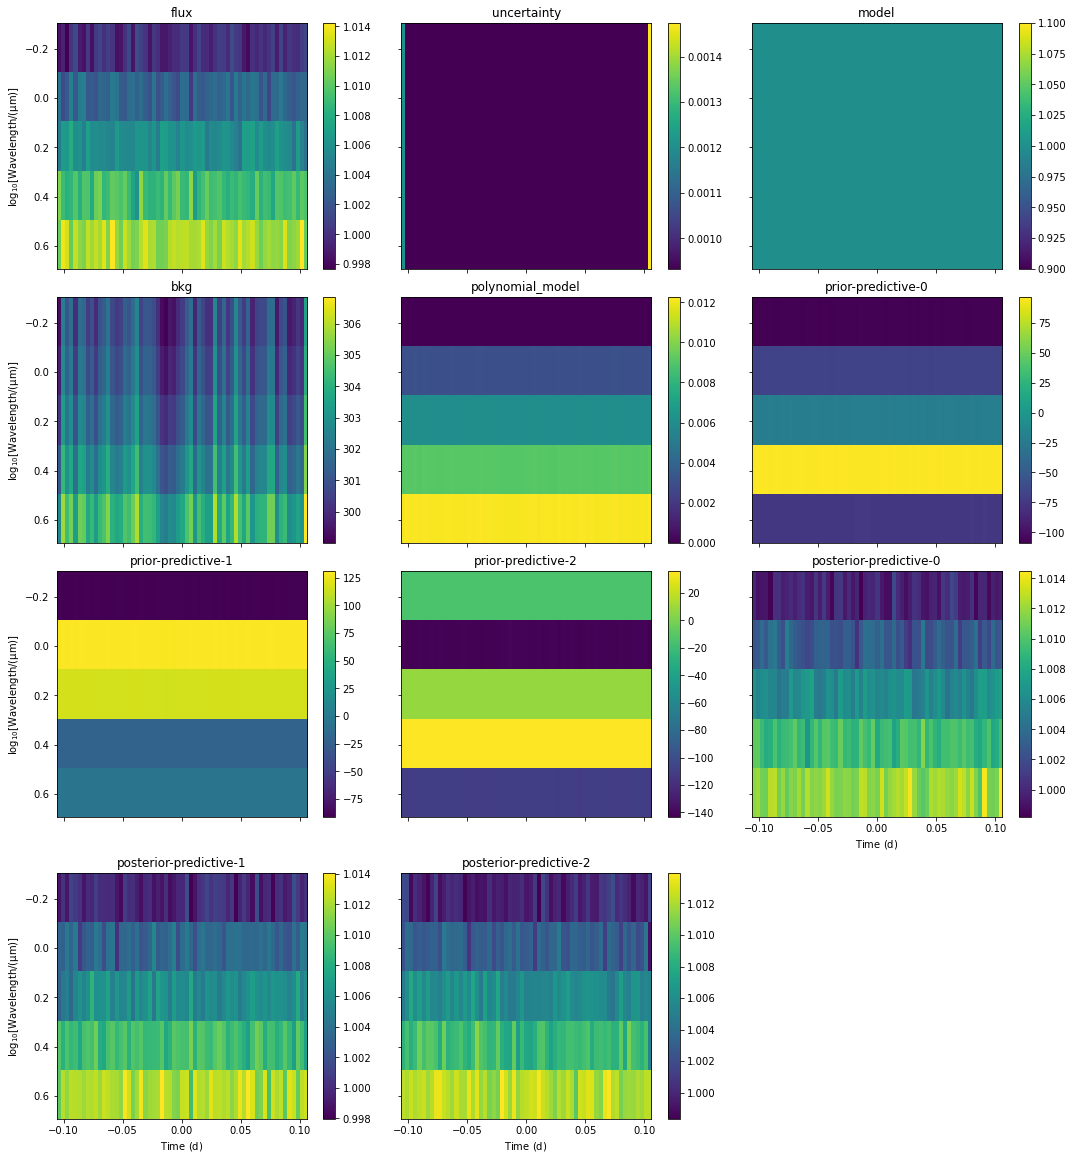

In [18]:
b.plot_priors()


🌈 Warning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample

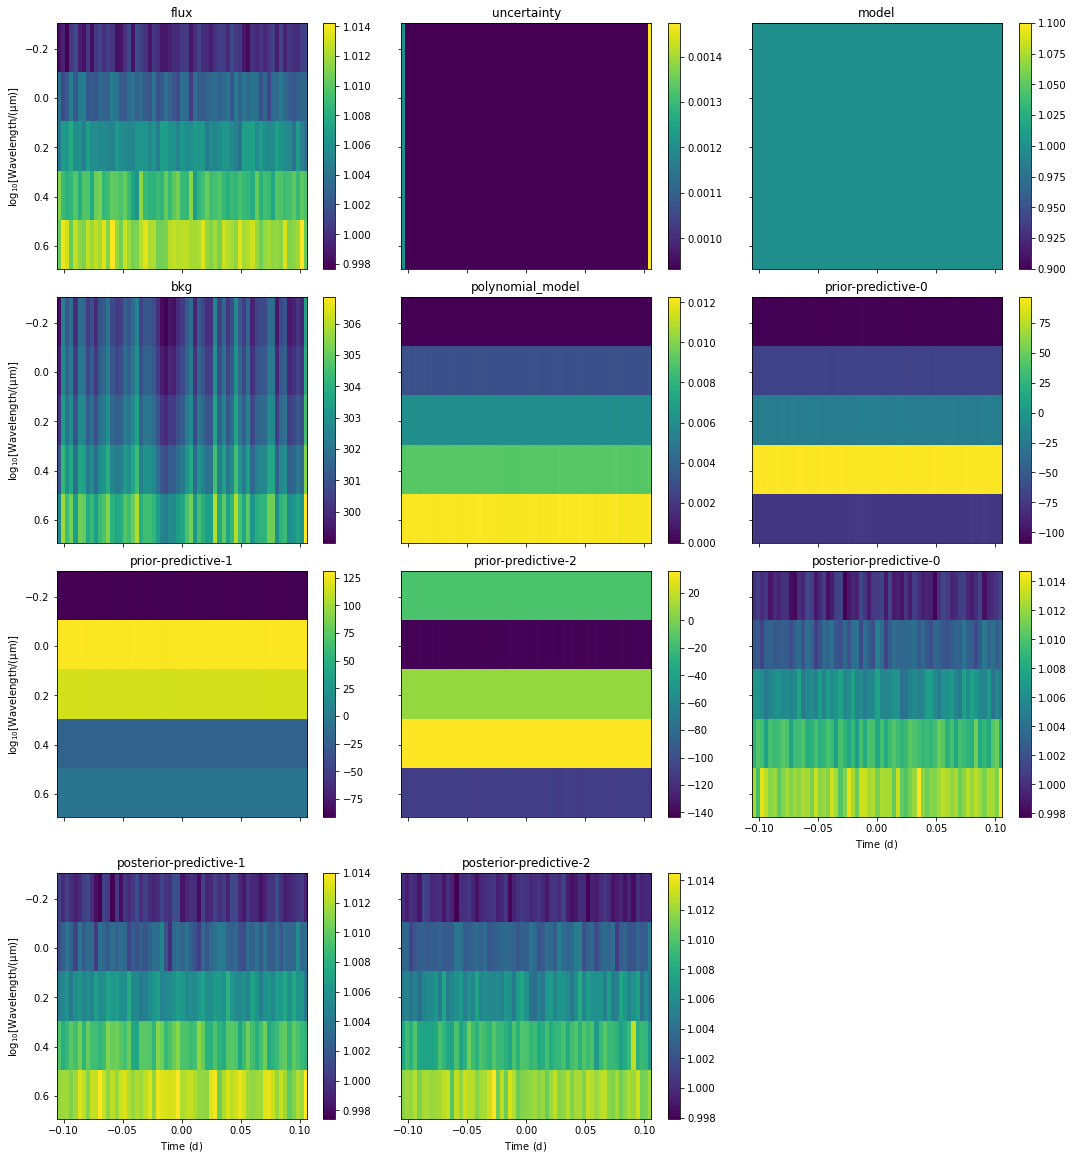

In [19]:
b.plot_posteriors()

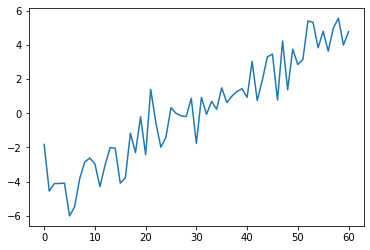

In [15]:
plt.plot(b.data.x)

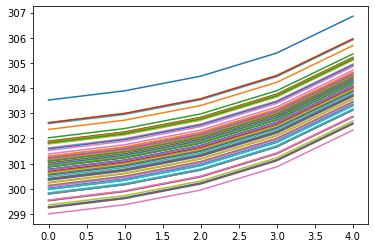

In [20]:
plt.plot(b.data.bkg);

### Combined Transit + Polynomial Model:

In [4]:
t3 = TransitModel()
t3.initialize_empty_model()

t3.setup_parameters(
#      period=Fitted(Uniform,testval=4.055259,lower=0.000009),
                  period=1,
                   epoch=Fitted(Uniform,lower=-0.05,upper=0.05),
                   stellar_radius = Fitted(Uniform, lower=0.8, upper=1.2,testval=1),
                   stellar_mass =Fitted(Uniform, lower=0.8, upper=1.2,testval=1),
                   radius_ratio=WavelikeFitted(Normal, mu=0.5, sigma=0.05),
                   impact_parameter=Fitted(ImpactParameter,ror=0.15,testval=0.44),
                   limb_darkening=Fitted(QuadLimbDark,testval=[0.05,0.35]),
                    baseline = Fitted(Uniform, lower=0.95,upper=1.05)
                )

In [67]:
## combine the models!
cm = CombinedModel()
cm.initialize_empty_model()
cm.attach_models({'transit':t3,'polynomial':b})
cm.attach_data(r)
cm.setup_lightcurves()
cm.setup_likelihood()
print(cm.chromatic_models)
print(cm.pymc3_model)

100%|█████████████████████████████████████████| 5/5 [00:00<00:00, 108660.73it/s]


{'transit': <experimental chromatic transit model 🌈>, 'polynomial': <experimental chromatic polynomial model 🌈>}
             epoch_interval__ ~ TransformedDistribution
    impact_parameter_impact__ ~ TransformedDistribution
    stellar_radius_interval__ ~ TransformedDistribution
      stellar_mass_interval__ ~ TransformedDistribution
limb_darkening_quadlimbdark__ ~ TransformedDistribution
              radius_ratio_w0 ~ Normal
          baseline_interval__ ~ TransformedDistribution
              radius_ratio_w1 ~ Normal
              radius_ratio_w2 ~ Normal
              radius_ratio_w3 ~ Normal
              radius_ratio_w4 ~ Normal
              p_w0_interval__ ~ TransformedDistribution
              p_w1_interval__ ~ TransformedDistribution
              p_w2_interval__ ~ TransformedDistribution
              p_w3_interval__ ~ TransformedDistribution
              p_w4_interval__ ~ TransformedDistribution
                        epoch ~ Uniform
             impact_parameter ~ Impa


🌈 Warning: invalid value encountered in log

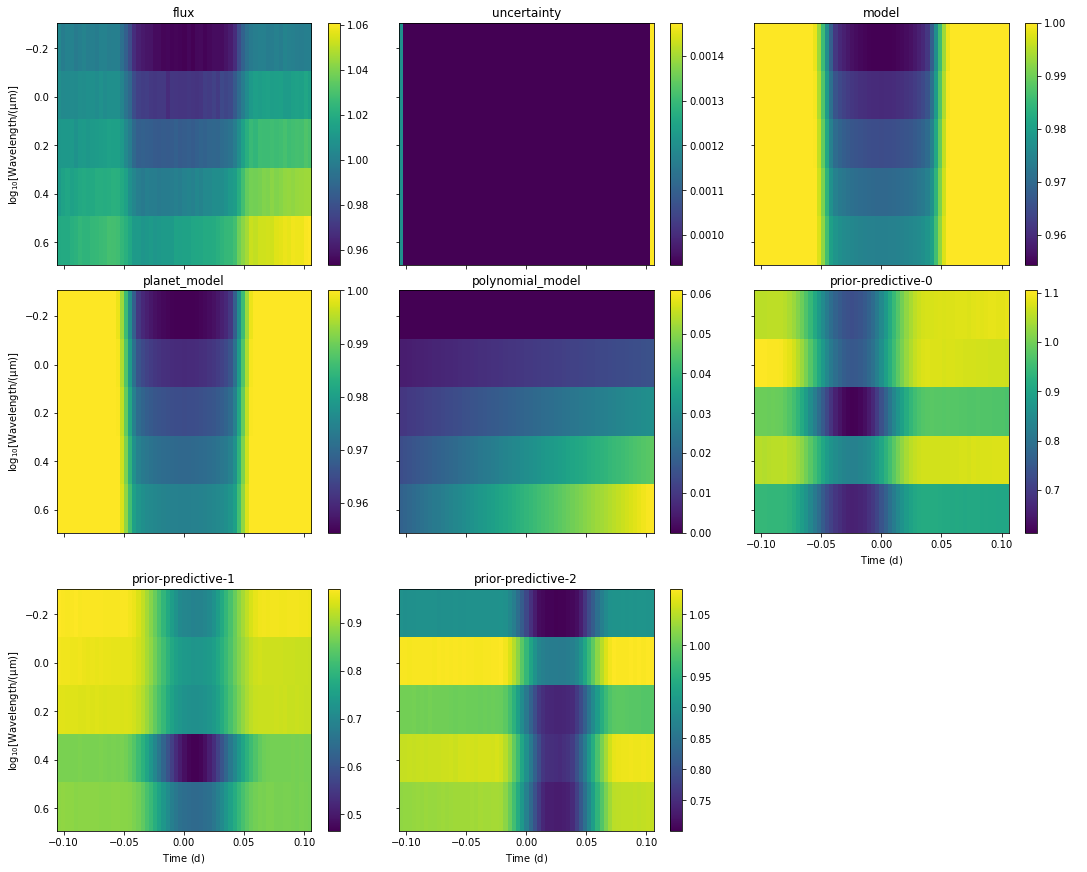

In [68]:
cm.plot_priors()

In [ ]:
cm.sample(tune=3000, draws=3000, cores=12, chains=4)
cm.summarize(round_to=7, fmt='wide')


🌈 Warning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.Multiprocess sampling (4 chains in 12 jobs)
NUTS: [p_w4, p_w3, p_w2, p_w1, p_w0, radius_ratio_w4, radius_ratio_w3, radius_ratio_w2, radius_ratio_w1, baseline, radius_ratio_w0, limb_darkening, stellar_mass, stellar_radius, impact_parameter, epoch]



🌈 Warning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample

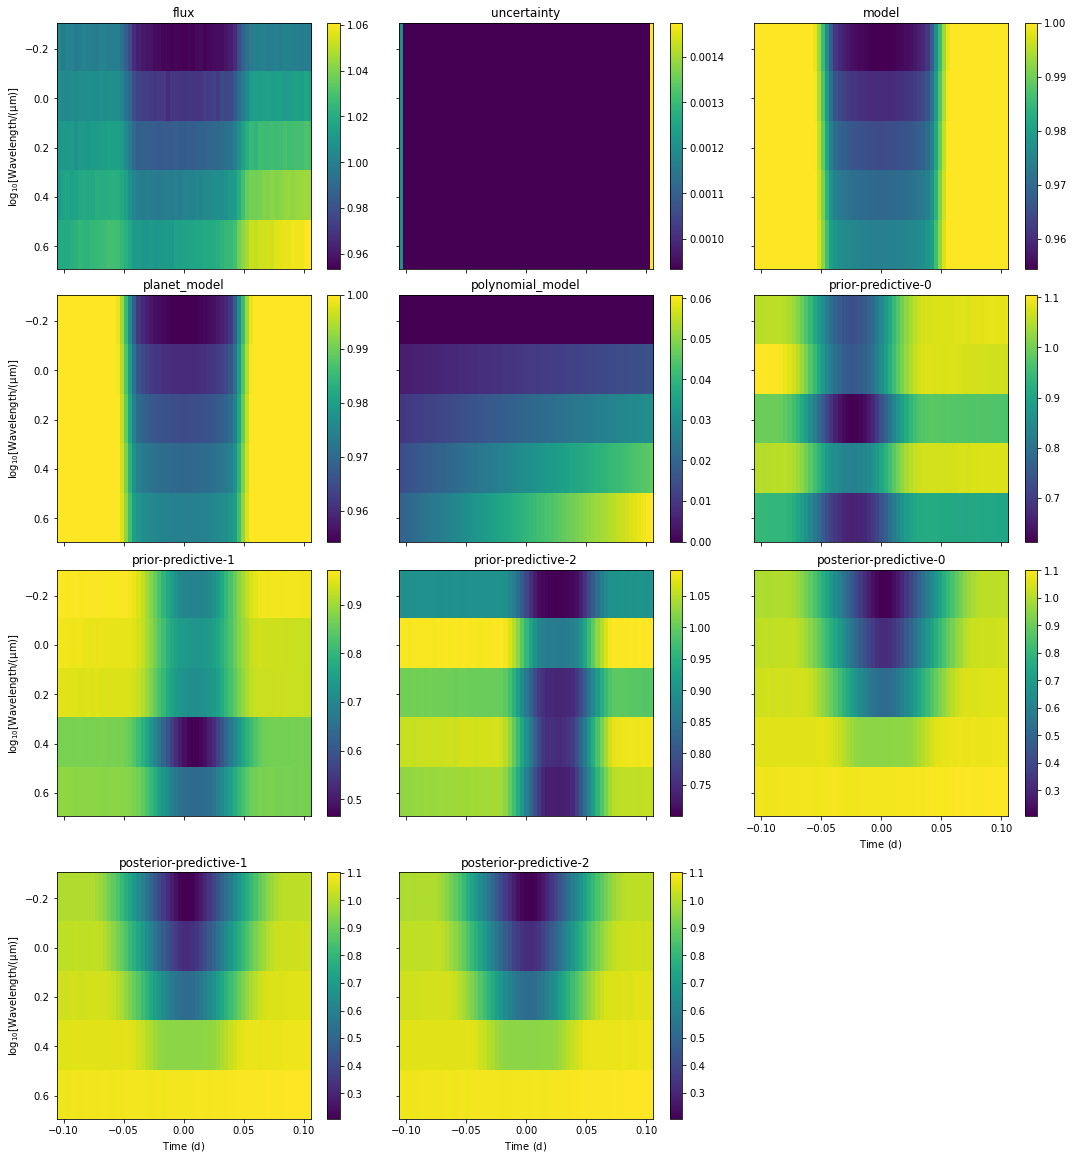

In [70]:
cm.plot_posteriors()